# Quickstart of SuPy

This quickstart demonstrates the essential and simplest workflow of `supy` in SUEWS simulation:

1. [load SUEWS input files](#Load-SUEWS-input-files)
2. [run SUEWS simulation](#Run-SUEWS-simulations)
3. [examine SUEWS results](#Examine-SUEWS-results)

More advanced use of `supy` are available in the [tutorials](tutorials/index)

Before start, we need to load the following necessary packages.

In [1]:
import supy as sp
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

## Load SUEWS input files

First, a path to SUEWS `RunControl.nml` should be specified, which will direct `supy` to locate input files.

In [2]:
dir_start = Path('/Users/sunt05/Dropbox/OneDrive/SuPy/dev-test/SampleRun')

### Model configuration

We call `sp.init_SUEWS_pd` to initialise a SUEWS simulation and get two `pandas` objects (note: the following names CAN be customised and are NOT fixed to the examples shown here):

1. `ser_mod_cfg`: a `Seires` for model-wide specifications
2. `df_state_init`: a `DataFrame` for grid-specific settings

Once loaded in, these objects CAN be modified and reused for conducting simulations that differ from the one configured via input files under the above `dir_start`.

In [3]:
ser_mod_cfg, df_state_init = sp.init_SUEWS_pd(dir_start)

A sample `ser_mod_cfg` looks like below:

In [4]:
ser_mod_cfg

resolutionfilesinestm                3600
resolutionfilesin                    3600
multipleinitfiles                       0
keeptstepfilesin                        1
multipleestmfiles                       1
waterdepth                          20000
multiplemetfiles                        0
solweiguse                              0
kdownzen                                0
ncmode                                  0
raindisaggmethod                      100
fileinputpath                    ./Input/
cbluse                                  0
disaggmethod                            1
resolutionfilesout                   3600
keeptstepfilesout                       0
filecode                             test
nrow                                    1
suppresswarnings                        1
writeoutoption                          2
year                     [2004.0, 2005.0]
ncol                                    1
fileoutputpath                  ./Output/
disaggmethodestm                  

A sample `df_state_init` looks below (note that `.T` is used here to a nicer tableform view):

In [5]:
df_state_init.T

grid,1
aerodynamicresistancemethod,2
ah_min,"[15.0, 15.0]"
ah_slope_cooling,"[2.7, 2.7]"
ah_slope_heating,"[2.7, 2.7]"
ahprof_24hr,"[[0.57, 0.65], [0.45, 0.49], [0.43, 0.46], [0...."
alb,"[0.12, 0.15, 0.12, 0.18, 0.21, 0.21, 0.1]"
albdectr_id,[0.12]
albevetr_id,[0.11]
albgrass_id,[0.18]
albmax_dectr,0.18


### Meteorological forcing

Following the convention of SUEWS, `supy` loads meteorological forcing (met-forcing) files at the grid level.

<div class="alert alert-info">

**Note:** 
    
    If `multiplemetfiles = 0` (i.e., all grids use the same met-forcing file) is set in `ser_mod_cfg`, the `grid` argument takes NO effect and is ignored by `supy`.

</div>

In [6]:
grid = df_state_init.index[0]
df_forcing = sp.load_SUEWS_Forcing_df_grid(dir_start, grid, ser_mod_cfg, df_state_init)

## Run SUEWS simulations

Once met-forcing (via `df_forcing`) and initial conditions (via `df_state_init`) are loaded in, we call `sp.run_suews_df` to conduct a SUEWS simulation, which will return two `pandas` `DataFrame`s: `df_output` and `df_state`.

In [7]:
df_output, df_state = sp.run_suews_df(df_forcing, df_state_init)

### `df_output`

`df_output` is an ensemble output collection of major SUEWS output groups, including:
    
    * SUEWS: the essential SUEWS output variables
    * DailyState: variables of daily state information
    * snow: snow output variables (effective when `snowuse = 1` set in `ser_mod_cfg`)
    * ESTM: ESTM output variables (not implemented yet)


In [8]:
df_output.columns.levels[0]

Index(['DailyState', 'ESTM', 'SUEWS', 'snow'], dtype='object', name='group')

### `df_state`

`df_state` is a `DataFrame` for holding:
    
   1. all model states if `save_state` is set to `True` when calling `sp.run_suews_df` and `supy` may run significantly slower for a large simulation;
   2. or, only the final state if `save_state` is set to `False` (the default setting) in which mode `supy` has a similar performance as the standalone compiled SUEWS executable.

Entries in `df_state` have the same data structure as `df_state_init` and can thus be used for other SUEWS simulations staring at the timestamp as in `df_state`.

In [9]:
df_state.T

,1
aerodynamicresistancemethod,2
ah_min,"[15.0, 15.0]"
ah_slope_cooling,"[2.7, 2.7]"
ah_slope_heating,"[2.7, 2.7]"
ahprof_24hr,"[[0.57, 0.65], [0.45, 0.49], [0.43, 0.46], [0...."
alb,"[0.12, 0.15, 0.15636363636363637, 0.1871702829..."
albdectr_id,[0.1871702829813988]
albevetr_id,[0.15636363636363637]
albgrass_id,[0.21951846022994526]
albmax_dectr,0.18


## Examine SUEWS results

Thanks to the functionality inherited from `pandas` and other packages under the [PyData](https://pydata.org) stack, compared with the standard SUEWS simulation workflow, `supy` enables more convenient examination of SUEWS results by statistics calculation, resampling, plotting (and many more).

### Ouptut structure

`df_output` is organised with `MultiIndex` `(grid,timestamp)` and `(group,varaible)` as `index` and `columns`, respectively.

In [10]:
df_output.head()

group                 SUEWS                                                    \
var                   Kdown  Kup       Ldown         Lup Tsurf         QN  QF   
1 2004-01-01 00:30:00   0.0  0.0  285.876254  334.402451  4.49 -48.526197 NaN   
  2004-01-01 00:35:00   0.0  0.0  285.876254  334.402451  4.49 -48.526197 NaN   
  2004-01-01 00:40:00   0.0  0.0  285.967345  334.314781  4.47 -48.347436 NaN   
  2004-01-01 00:45:00   0.0  0.0  286.058550  334.227138  4.45 -48.168587 NaN   
  2004-01-01 00:50:00   0.0  0.0  286.149869  334.139520  4.43 -47.989650 NaN   

group                                                    ... DailyState  \
var                            QS          QH         QE ...   DSnowPvd   
1 2004-01-01 00:30:00 -173.100377 -859.854545 -14.571275 ...        NaN   
  2004-01-01 00:35:00 -173.100377 -858.446676 -15.979144 ...        NaN   
  2004-01-01 00:40:00 -172.954508 -856.885762 -17.507166 ...        NaN   
  2004-01-01 00:45:00 -172.808567 -855.178645 -19.181375 ...        NaN   
  2004-01-01 00:50:00 -172.662555 -853.311439 -21.015657 ...        NaN   

group                                                                         \
var                   DSnowBldgs DSnowEveTr DSnowDecTr DSnowGrass DSnowBSoil   
1 2004-01-01 00:30:00        NaN        NaN        NaN        NaN        NaN   
  2004-01-01 00:35:00        NaN        NaN        NaN        NaN        NaN   
  2004-01-01 00:40:00        NaN        NaN        NaN        NaN        NaN   
  2004-01-01 00:45:00        NaN        NaN        NaN        NaN        NaN   
  2004-01-01 00:50:00        NaN        NaN        NaN        NaN        NaN   

group                                         
var                   DSnowWater  a1  a2  a3  
1 2004-01-01 00:30:00        NaN NaN NaN NaN  
  2004-01-01 00:35:00        NaN NaN NaN NaN  
  2004-01-01 00:40:00        NaN NaN NaN NaN  
  2004-01-01 00:45:00        NaN NaN NaN NaN  
  2004-01-01 00:50:00        NaN NaN NaN NaN  

[5 rows x 245 columns]

Here we demonstrate several typical scenarios for SUEWS results examination.

The essential `SUEWS` output collection is extracted as a separate variable for easier processing in the following sections. More [advanced slicing techniques](http://pandas.pydata.org/pandas-docs/stable/advanced.html#multiindex-advanced-indexing) are available in `pandas` documentation.

In [11]:
df_output_suews=df_output['SUEWS']

### Statistics Calculation

We can use `.describe()` method for a quick overview of the key surface energy balance budgets.

In [12]:
df_output_suews.loc[:,['QN','QS','QH','QE','QF']].describe()

var,QN,QS,QH,QE,QF
count,106837.000000,106837.000000,106837.000000,106837.000000,1.780600e+04
mean,48.764619,-93.711070,-479.114014,-377.410296,-9.990000e+02
std,147.328932,120.220409,72.834483,66.348341,1.136900e-13
min,-84.134636,-202.156863,-859.854545,-571.301999,-9.990000e+02
25%,-41.240859,-167.155541,-530.659469,-424.461468,-9.990000e+02
50%,-26.565113,-155.180132,-472.520598,-381.058872,-9.990000e+02
75%,80.620308,-67.716829,-425.008972,-332.600684,-9.990000e+02
max,659.435343,404.596240,-290.480240,-14.571275,-9.990000e+02


### Plotting

Plotting is very straightforward via the `.plot` method bounded with `pandas` objects.

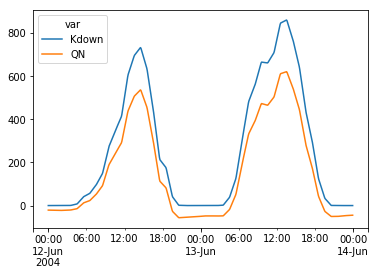

In [13]:
df_output_suews.loc[1].loc['2004 6 12':'2004 6 13',['Kdown','QN']].plot()

### Resampling

The suggested runtime/simulation frequency of SUEWS is `300 s`, which usually results a large output and may be over-weighted for storage. To slim down the output size, we can `resample` the default output. 

In [14]:
df_output_suews_rsmp=df_output_suews.loc[1].resample('1h').mean()

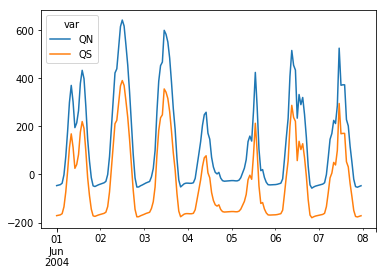

In [15]:
df_output_suews_rsmp.loc['2004 6 1':'2004 6 7',['QN','QS']].plot()

The resampled output can be outputed for a smaller file.

In [16]:
df_output_suews_rsmp.to_csv('suews_1h.txt',
                            sep='\t',
                            float_format='%8.2f',
                            na_rep=-999)

For a justified format, we use the `to_string` for better format controlling and write the formatted string out to a file.

In [17]:
str_out=df_output_suews_rsmp.to_string(
    float_format='%8.2f',
    na_rep='-999',
    justify='right')
with open('suews_sample.txt','w') as file_out:
    print(str_out,file=file_out)